# Notebook Demonstration

In [1]:
! pip install git+https://github.com/Julien2048/GANs.git --quiet
! git clone https://github.com/Julien2048/GANs

  Preparing metadata (setup.py) ... done
Cloning into 'GANs'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 83 (delta 29), reused 59 (delta 12), pack-reused 0
Unpacking objects: 100% (83/83), 23.76 MiB | 9.43 MiB/s, done.


In [2]:
from gan.gan import GANS
from gan.sampler import EulerMaruyamaSampler, EulerMaruyamaSamplerCorrector
from gan.score_based_model import ScoreNet
from gan.sde import SimpleSDE, VESDE, VPSDE

# Load DataSets

In [3]:
process = GANS(
    model = ScoreNet,
    sde = SimpleSDE(), # SimpleSDE, VPSDE or VESDE
    data_loader = 'FMNIST', # Choose between MNIST and FMNIST
    sampler = EulerMaruyamaSamplerCorrector(num_steps_cor=10), # Check sampler.py file
    device = 'cuda'
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17076989.56it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305861.98it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5642080.52it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6094348.57it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [4]:
load = True # load = False to retrain the model
if load:
    process.load_model()
else:
    process.train_model(n_epochs=50)
    process._plot_loss()

/usr/local/lib/python3.10/dist-packages/gan/sde.py:125: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.randn(shape[0], 1, 28, 28, device=self.device) * torch.sqrt((self.sigma**(2 * torch.tensor(t, device=self.device)) - 1.) / 2. / np.log(self.sigma))[:, None, None, None]


  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/gan/sde.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std = torch.sqrt((self.sigma**(2 * torch.tensor(t, device=self.device)) - 1.) / 2. / np.log(self.sigma))
/usr/local/lib/python3.10/dist-packages/gan/sde.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  diffusion = torch.tensor(self.sigma ** t, device=self.device)


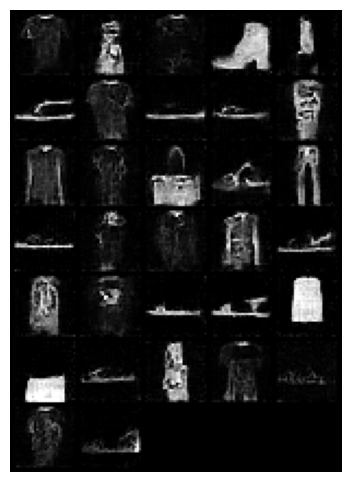

In [5]:
process.direct_sampling(32)
process.plot_samples()